In [1]:
#UNSUPERVISED CLASSIFICATION

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'subset_0_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc'
ds = xr.open_dataset(PATH+FILENAME)  # loading dataset

In [4]:
ds

<xarray.Dataset>
Dimensions:                       (lat: 962, lon: 2733)
Coordinates:
  * lat                           (lat) float64 51.0 51.0 51.0 ... 50.83 50.83
  * lon                           (lon) float64 14.15 14.15 14.15 ... 14.4 14.4
Data variables: (12/47)
    B1                            (lat, lon) float32 ...
    B2                            (lat, lon) float32 ...
    B3                            (lat, lon) float32 ...
    B4                            (lat, lon) float32 ...
    B5                            (lat, lon) float32 ...
    B6                            (lat, lon) float32 ...
    ...                            ...
    view_zenith_B10               (lat, lon) float32 ...
    view_azimuth_B10              (lat, lon) float32 ...
    view_zenith_B11               (lat, lon) float32 ...
    view_azimuth_B11              (lat, lon) float32 ...
    view_zenith_B12               (lat, lon) float32 ...
    view_azimuth_B12              (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     385:293
    start_date:   09-APR-2018 10:10:31.026000
    stop_date:    09-APR-2018 10:10:31.026000
    title:        NetCDF/CF Data Product

In [5]:
#First, we reduce our dataset so that just the spectral bands are used for our analysis.

ds_reduced = ds[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']]
ds_reduced

<xarray.Dataset>
Dimensions:  (lat: 962, lon: 2733)
Coordinates:
  * lat      (lat) float64 51.0 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon      (lon) float64 14.15 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables:
    B1       (lat, lon) float32 ...
    B2       (lat, lon) float32 ...
    B3       (lat, lon) float32 ...
    B4       (lat, lon) float32 ...
    B5       (lat, lon) float32 ...
    B6       (lat, lon) float32 ...
    B7       (lat, lon) float32 ...
    B8       (lat, lon) float32 ...
    B8A      (lat, lon) float32 ...
    B9       (lat, lon) float32 ...
    B11      (lat, lon) float32 ...
    B12      (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     385:293
    start_date:   09-APR-2018 10:10:31.026000
    stop_date:    09-APR-2018 10:10:31.026000
    title:        NetCDF/CF Data Product

In [6]:
#Formel für NDVI
def NDVI(ds_reduced):
    ds_reduced['NDVI']=(ds_reduced.B8 - ds_reduced.B4)/(ds_reduced.B8 + ds_reduced.B4)  # Hinzufügen des neuen Bandes NDVI zum Datensatz

In [7]:
#NDVI
NDVI(ds_reduced)

In [8]:
def plotting(ds,vmin='NULL',vmax='NULL',cmap='NULL',title='NULL'):
    fig, ax = plt.subplots(figsize=(12,10))
    ds.plot(ax=ax,vmin=vmin,vmax=vmax,cmap=cmap)
    plt.tight_layout();
    title=title
    plt.title(title, fontsize=22) 

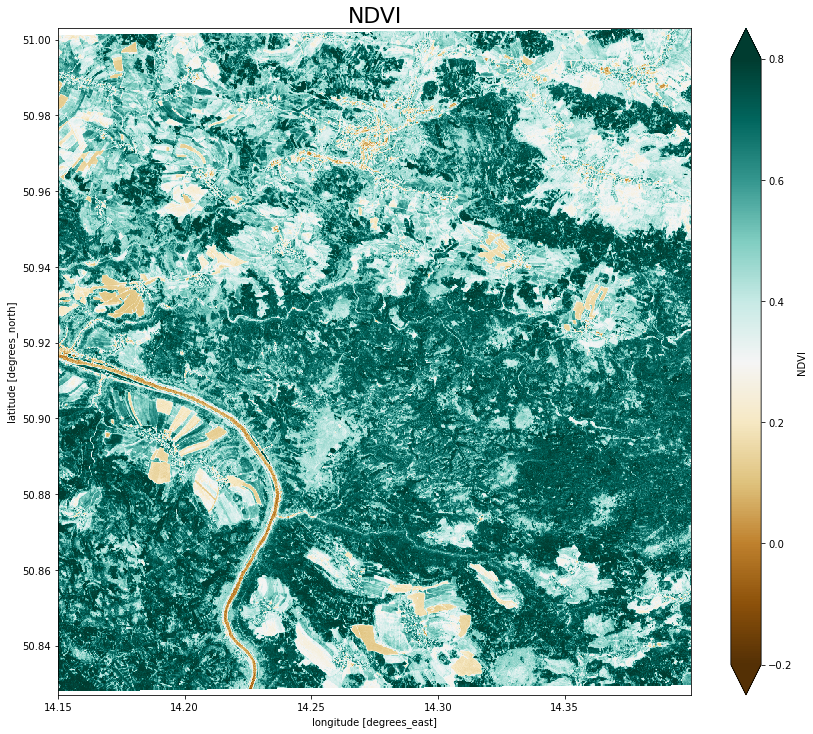

In [9]:
plotting(ds_reduced.NDVI,vmin=-0.2,vmax=0.8, cmap='BrBG',title='NDVI')

In [10]:
# Formel für BRI
def BRI (ds_reduced):
    ds_reduced['BRI'] = (1/1550)  - (1/700) / ds_reduced.B8

In [11]:
#BRI
BRI(ds_reduced)

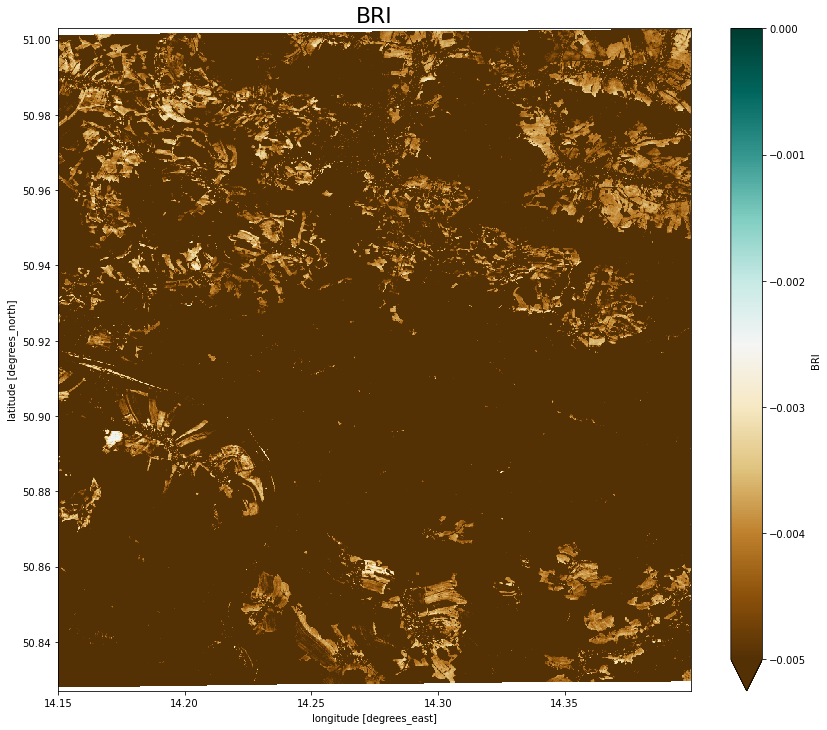

In [12]:
plotting(ds_reduced.BRI,vmin=-0.005,vmax=0.0, cmap='BrBG',title='BRI')

In [13]:
#Formel für GVI
def GVI(ds_reduced):
    ds_reduced['GVI'] = -0.2848 * ds_reduced.B2 - 0.24 * ds_reduced.B3 - 0.5436 * ds_reduced.B4 + 0.7243 * ds_reduced.B8 + 0.0840 * ds_reduced.B11 - 0.1800 * ds_reduced.B12

In [14]:
#GVI
GVI(ds_reduced)

In [15]:
#Formel für WET
def WET(ds_reduced):
    ds_reduced['WET'] = 0.1509 * ds_reduced.B2 +0.1973 * ds_reduced.B3 + 0.3279 * ds_reduced.B4 + 0.3406 * ds_reduced.B8 - 0.7112 * ds_reduced.B11 - 0.4572 * ds_reduced.B12

In [16]:
#WET
WET(ds_reduced)

In [17]:
#Convert the xarray to a pandas dataframe in order to apply clustering and PCA afterwards

df = ds_reduced.to_dataframe()  # converting to pandas dataframe
df

B1  B2  B3  B4  B5  B6  B7  B8  B8A  B9  B11  B12  NDVI  \
lat       lon                                                                  
51.002887 14.149971 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150062 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150154 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150245 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150337 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
...                  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ...   ...   
50.827062 14.399528 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399620 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399711 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399803 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399894 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   

                     BRI  GVI  WET  
lat       lon                       
51.002887 14.149971  NaN  NaN  NaN  
          14.150062  NaN  NaN  NaN  
          14.150154  NaN  NaN  NaN  
          14.150245  NaN  NaN  NaN  
          14.150337  NaN  NaN  NaN  
...                  ...  ...  ...  
50.827062 14.399528  NaN  NaN  NaN  
          14.399620  NaN  NaN  NaN  
          14.399711  NaN  NaN  NaN  
          14.399803  NaN  NaN  NaN  
          14.399894  NaN  NaN  NaN  

[2629146 rows x 16 columns]

In [18]:
#NANs

df.isnull().values.any()  # check if there are any NaNs
df.isnull().sum().sum()  # counting the NaNs in the whole dataframe, sum across columns and rows

714160

In [19]:
#deleting NANs

df = ds_reduced.to_dataframe().dropna(how='any')
df.isnull().sum().sum()

0

In [20]:
#kmeans clustering

n_clusters = 20 #number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0) # init k-means model 
kmeans.fit_predict(df) # apply k-means to data 
print(kmeans.labels_)   # show the cluster number for each data point 

[ 8  8 17 ...  8  8  8]


In [21]:
#Copy the dataframe to a new dataframe and add the cluster label for each pixel.

df_cluster = df
df_cluster['KMeanCluster'] = kmeans.labels_  # adding the labels to our dataset


In [22]:
#NEW COLUMN FOR LABELING

df_cluster['ClusterNumber'] = df_cluster.KMeanCluster

df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368791  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368883  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345  0.790439   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367  0.745324   
          14.368791  0.1164  0.1305  0.1387  0.0704  0.0367  0.673616   
          14.368883  0.1164  0.1305  0.1387  0.0704  0.0367  0.673616   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416  0.726601   
...                     ...     ...     ...     ...     ...       ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362  0.774291   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273  0.787044   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273  0.780989   

                          BRI       GVI       WET  KMeanCluster  ClusterNumber  
lat       lon                                                                   
51.002521 14.368608 -0.009805  0.081019 -0.004588             8              8  
          14.368700 -0.011132  0.068631 -0.013443             8              8  
          14.368791 -0.011628  0.061507 -0.012934            17             17  
          14.368883 -0.011628  0.061507 -0.012934            17             17  
          14.368974 -0.009544  0.076990 -0.007945             8              8  
...                       ...       ...       ...           ...            ...  
50.828160 14.156100 -0.009073  0.085512 -0.002521             8              8  
          14.156192 -0.009937  0.079545 -0.008331             8              8  
          14.156283 -0.009937  0.079545 -0.008331             8              8  
          14.156375 -0.011260  0.070817 -0.004172             8              8  
          14.156466 -0.011554  0.068822 -0.005274             8              8  

[2584511 rows x 18 columns]

In [23]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_cluster = df_cluster.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_cluster = ds_cluster.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_cluster

<xarray.Dataset>
Dimensions:        (lat: 954, lon: 2733)
Coordinates:
  * lat            (lat) float64 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon            (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/18)
    B1             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B2             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B3             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B4             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B5             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B6             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    ...             ...
    NDVI           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    BRI            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    GVI            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    WET            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    KMeanCluster   (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    ClusterNumber  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [24]:
SAVING_FILENAME = "new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
ds_cluster.to_netcdf(PATH + SAVING_FILENAME)

In [25]:
#Defines a function to plot the clustering result as a thematic map

def plotting_lc(ds,cmap='NULL', variable='NULL',n_clusters='NULL',legend_labels='NULL',title='NULL'):  # modifying plotting function to achieve a discrete colorbar
    ds = ds.sortby('lat', ascending=False)
    
    fig, ax = plt.subplots(figsize=(15,10), dpi=100)
    ax.imshow(ds[variable],cmap=cmap, aspect='auto')
    
    # specifying legend
    norm= colors.BoundaryNorm(np.arange(0,n_clusters+1)-0.5, n_clusters)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.arange(0,n_clusters), fraction=0.042, pad=0.02)

    cbar.set_label('cluster')
    cbar.ax.set_yticklabels(legend_labels)
    
    # specifiying x- and y-axis
    lon_ticks = np.around(np.linspace(ds.lon.data.min(), ds.lon.data.max(), 6), 2)
    lon_ticks_pos = np.linspace(0, len(ds.lon.data), 6)
    lat_ticks = np.around(np.linspace(ds.lat.data.max(), ds.lat.data.min(), 6), 2)
    lat_ticks_pos = np.linspace(0, len(ds.lat.data), 6)
    ax.set_xticks(lon_ticks_pos)
    ax.set_xticklabels(lon_ticks)
    ax.set_yticks(lat_ticks_pos)
    ax.set_yticklabels(lat_ticks)
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    
    plt.tight_layout()
    plt.title(title, fontsize=22)
    
    #plt.savefig('D:\\E4\\kmeans_clustering_april_new.png')

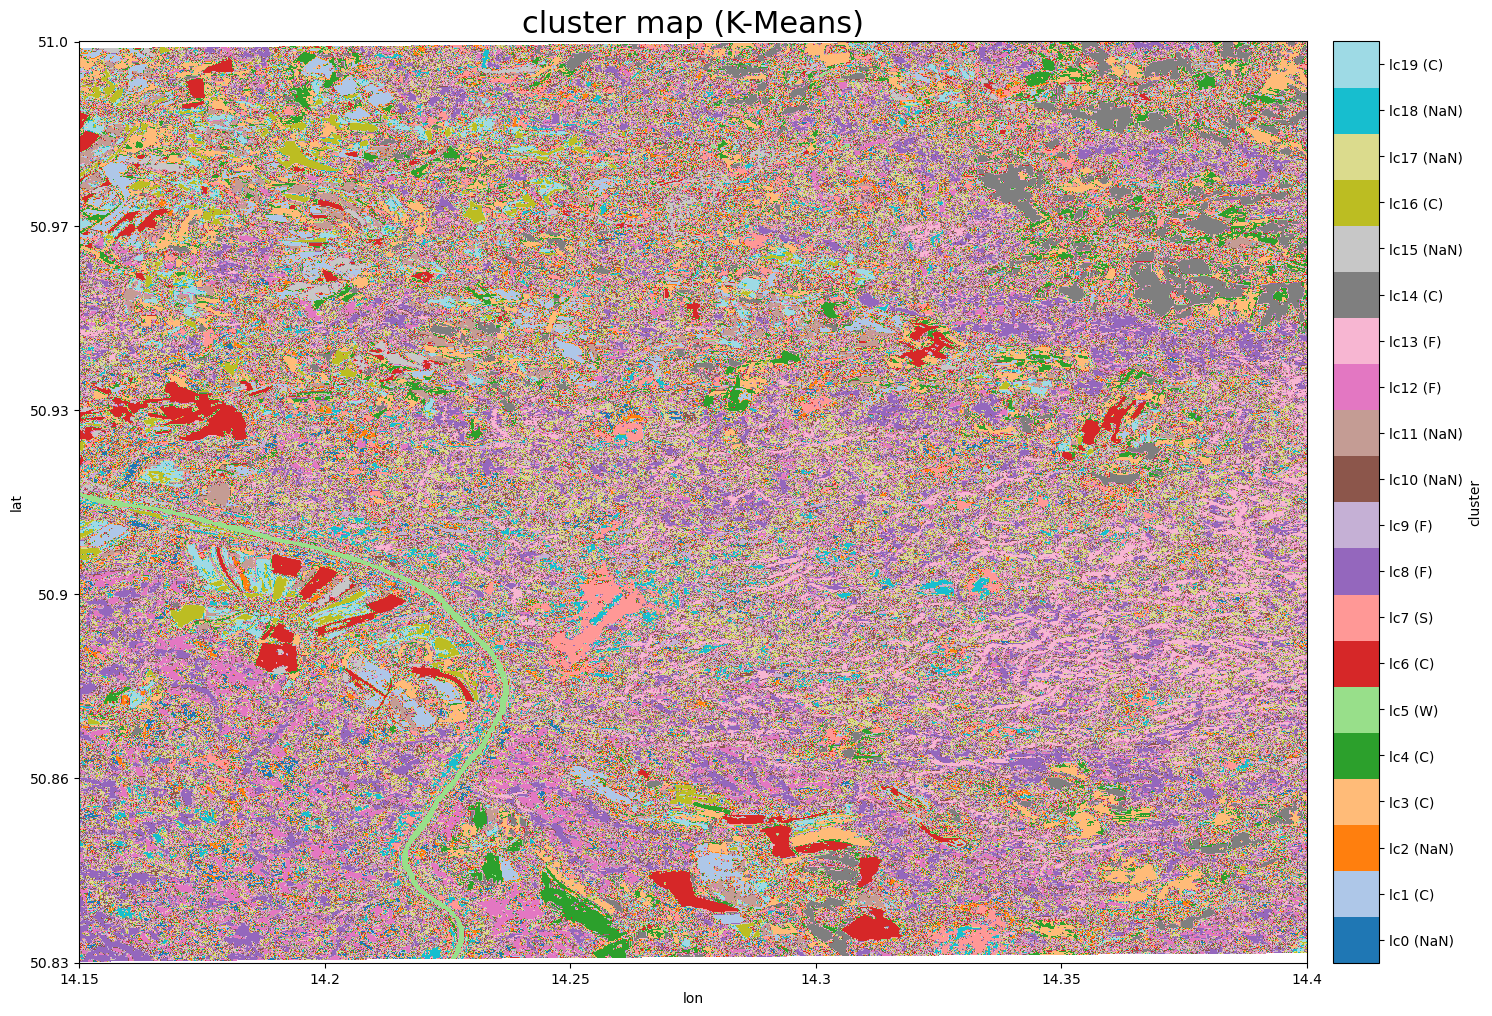

In [27]:
cmap = plt.cm.get_cmap('tab20', n_clusters)  # create colormap
legend_labels = ['lc0 (NaN)', 'lc1 (C)', 'lc2 (NaN)', 'lc3 (C)', 'lc4 (C)', 'lc5 (W)', 'lc6 (C)', 'lc7 (S)', 'lc8 (F)', 'lc9 (F)','lc10 (NaN)', 'lc11 (NaN)', 'lc12 (F)', 'lc13 (F)' , 'lc14 (C)', 'lc15 (NaN)', 'lc16 (C)', 'lc17 (NaN)', 'lc18 (NaN)', 'lc19 (C)']  # define legend labels
title = 'cluster map (K-Means)'  # set figure title

plotting_lc(ds_cluster, variable='KMeanCluster', n_clusters=n_clusters, cmap=cmap, legend_labels=legend_labels,
            title=title)

In [ ]:
#21 = crop, 22 = forest, 23 = water, 24 = soil, NaN = NaN

In [57]:
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([1,3,4,6,14,16,19],21)
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([8,9,12,13],22)
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([5],23)
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([7],24)
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([0,2,17, 10, 11,15,18],'NaN')

df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
          14.369066  0.0168  0.0173  0.0297  0.0240  0.0414  0.1020  0.1200   
          14.369157  0.0168  0.0173  0.0297  0.0240  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345  0.790439   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367  0.745324   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416  0.726601   
          14.369066  0.1434  0.1335  0.1387  0.0726  0.0416  0.713262   
          14.369157  0.1434  0.1335  0.1387  0.0726  0.0416  0.713262   
...                     ...     ...     ...     ...     ...       ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362  0.774291   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273  0.787044   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273  0.780989   

                          BRI       GVI       WET  KMeanCluster  ClusterNumber  
lat       lon                                                                   
51.002521 14.368608 -0.009805  0.081019 -0.004588             8             22  
          14.368700 -0.011132  0.068631 -0.013443             8             22  
          14.368974 -0.009544  0.076990 -0.007945             8             22  
          14.369066 -0.009317  0.077374 -0.005471             8             22  
          14.369157 -0.009317  0.077374 -0.005471             8             22  
...                       ...       ...       ...           ...            ...  
50.828160 14.156100 -0.009073  0.085512 -0.002521             8             22  
          14.156192 -0.009937  0.079545 -0.008331             8             22  
          14.156283 -0.009937  0.079545 -0.008331             8             22  
          14.156375 -0.011260  0.070817 -0.004172             8             22  
          14.156466 -0.011554  0.068822 -0.005274             8             22  

[1574506 rows x 18 columns]

In [58]:
index_names = df_cluster[df_cluster['ClusterNumber'] == 'NaN'].index

index_names


MultiIndex([], names=['lat', 'lon'])

In [ ]:
#df_cluster['ClusterNumber'] = df_cluster.to_string(df_cluster['ClusterNumber'])

In [30]:
df_cluster.drop(index_names , inplace=True)

In [31]:
uniques = df_cluster.ClusterNumber.drop_duplicates()

print(uniques)

lat        lon      
51.002521  14.368608    22
           14.376110    24
           14.377482    21
50.996666  14.302377    23
Name: ClusterNumber, dtype: object


In [32]:
df_cluster['ClusterNumber'] = pd.to_numeric(df_cluster['ClusterNumber'],errors = 'coerce')

In [33]:
df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
          14.369066  0.0168  0.0173  0.0297  0.0240  0.0414  0.1020  0.1200   
          14.369157  0.0168  0.0173  0.0297  0.0240  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345  0.790439   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367  0.745324   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416  0.726601   
          14.369066  0.1434  0.1335  0.1387  0.0726  0.0416  0.713262   
          14.369157  0.1434  0.1335  0.1387  0.0726  0.0416  0.713262   
...                     ...     ...     ...     ...     ...       ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362  0.774291   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273  0.787044   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273  0.780989   

                          BRI       GVI       WET  KMeanCluster  ClusterNumber  
lat       lon                                                                   
51.002521 14.368608 -0.009805  0.081019 -0.004588             8             22  
          14.368700 -0.011132  0.068631 -0.013443             8             22  
          14.368974 -0.009544  0.076990 -0.007945             8             22  
          14.369066 -0.009317  0.077374 -0.005471             8             22  
          14.369157 -0.009317  0.077374 -0.005471             8             22  
...                       ...       ...       ...           ...            ...  
50.828160 14.156100 -0.009073  0.085512 -0.002521             8             22  
          14.156192 -0.009937  0.079545 -0.008331             8             22  
          14.156283 -0.009937  0.079545 -0.008331             8             22  
          14.156375 -0.011260  0.070817 -0.004172             8             22  
          14.156466 -0.011554  0.068822 -0.005274             8             22  

[1574506 rows x 18 columns]

In [34]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_cluster = df_cluster.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_cluster = ds_cluster.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_cluster

<xarray.Dataset>
Dimensions:        (lat: 954, lon: 2733)
Coordinates:
  * lat            (lat) float64 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon            (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/18)
    B1             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B2             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B3             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B4             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B5             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B6             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    ...             ...
    NDVI           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    BRI            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    GVI            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    WET            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    KMeanCluster   (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    ClusterNumber  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [35]:
SAVING_FILENAME = "new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
ds_cluster.to_netcdf(PATH + SAVING_FILENAME)

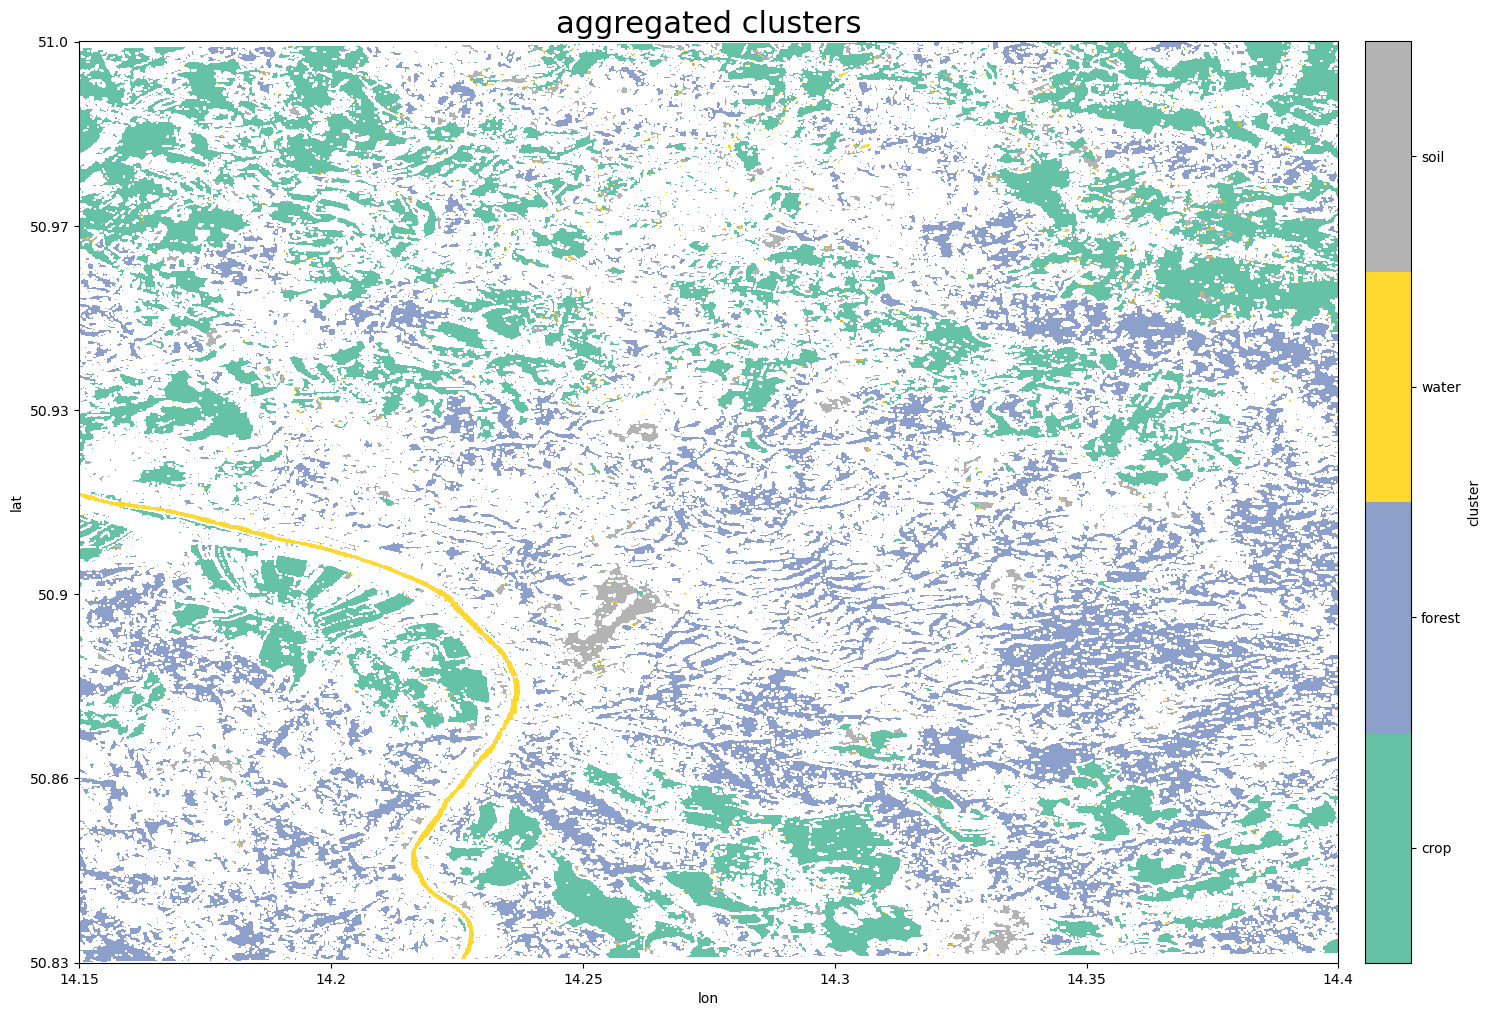

In [39]:
cmap = plt.cm.get_cmap('Set2', 4)  # create colormap
legend_labels = ['crop', 'forest', 'water', 'soil']  # define legend labels
title = 'aggregated clusters'  # set figure title

plotting_lc(ds_cluster, variable='ClusterNumber', n_clusters=4, cmap=cmap, legend_labels=legend_labels,
            title=title)

plt.savefig('D:\\E4\\kmeans_aggregated_clusters.png')

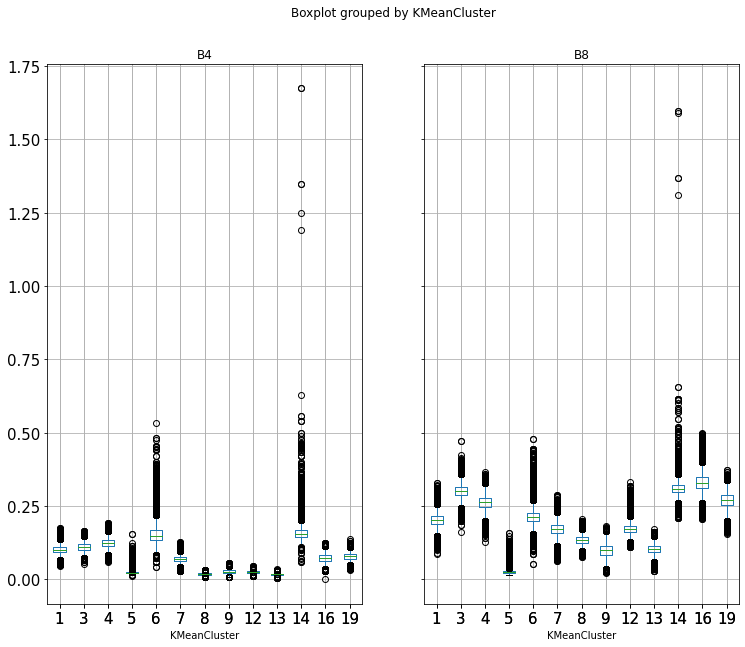

In [40]:
#You can also plot a boxplot to look at the distribution of reflectances in each cluster.

boxplot = df_cluster.boxplot(column=['B4', 'B8'], by='KMeanCluster', figsize=(12,10), fontsize=15)
plt.savefig('D:\\E4\\boxplot_kmeans_clustering_april')

In [ ]:
#JOIN REFERENCE DATA

In [41]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

In [42]:
#opening the clustered data as reference
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc'
ds_1 = xr.open_dataset(PATH+FILENAME)

ds_1.KMeanCluster

<xarray.DataArray 'KMeanCluster' (lat: 954, lon: 2733)>
[2607282 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 51.0 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon      (lon) float64 14.15 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4

In [43]:
#opening the sachsenforst data as reference
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'borkenkaeferbefall2018.nc'
ds_2 = xr.open_dataset(PATH+FILENAME)

ds_2.befall2018

<xarray.DataArray 'befall2018' (lat: 1925, lon: 4981)>
[9588425 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon          (lon) float64 14.0 14.0 14.0 14.0 ... 14.45 14.45 14.45 14.45
    spatial_ref  int32 ...

In [44]:
combined_ds = xr.open_mfdataset(['D:\\E4\\1606\\new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc', 'D:\\E4\\1606\\borkenkaeferbefall2018.nc'],combine = 'by_coords')

combined_ds

<xarray.Dataset>
Dimensions:        (lat: 2879, lon: 7714)
Coordinates:
  * lat            (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0 51.0
  * lon            (lon) float64 14.0 14.0 14.0 14.0 ... 14.45 14.45 14.45 14.45
    spatial_ref    int32 ...
Data variables: (12/19)
    B1             (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B2             (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B3             (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B4             (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B5             (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B6             (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    ...             ...
    BRI            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    GVI            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    WET            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    KMeanCluster   (lat, lon) float64 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    ClusterNumber  (lat, lon) float64 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    befall2018     (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>

In [45]:
PATH = 'D:\\E4\\1606\\'
SAVING_FILENAME = "combined_reference_data_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
combined_ds.to_netcdf(PATH + SAVING_FILENAME)

In [59]:
#Convert the xarray to a pandas dataframe in order to apply clustering and PCA afterwards

df_reference1 = ds_1.to_dataframe()  # converting to pandas dataframe
df_reference2 = ds_2.to_dataframe()

In [ ]:
df_reference2

In [61]:
uniques = df_reference2.befall2018.drop_duplicates()

print(uniques)

lat        lon      
51.002932  13.996467    NaN
           14.440420    0.0
51.000828  14.108347    1.0
Name: befall2018, dtype: float32


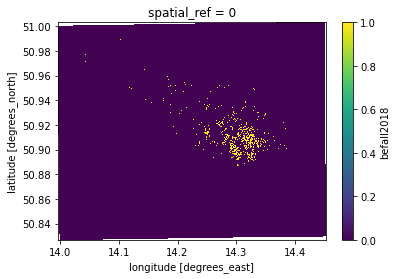

In [63]:
ds_2.befall2018.plot()

In [ ]:
#SUPERVISED CLASSIFICATION

In [46]:
PATH = 'D:\\E4\\1606\\'
FILENAME_2018 = "projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
FILENAME_2019 = "projected_Subset_S2B_MSIL2A_20190419T101029_N0211_R022_T33UVS_20190419T132322_resampled_wt.nc"
FILENAME_REF_2018 = "combined_reference_data_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
FILENAME_REF_2019 = "barkbeetlearea2019.nc"
data2018 = PATH + FILENAME_2018
data2019 = PATH + FILENAME_2019
ref2018 = PATH + FILENAME_REF_2018
ref2019 = PATH + FILENAME_REF_2019

In [47]:
ds_sc = xr.open_mfdataset([data2018, data2019, ref2018, ref2019])  # this is an option to open and instantly merge the data into one dataset
ds_sc = ds_sc.drop('spatial_ref')
ds_sc

<xarray.Dataset>
Dimensions:                       (lat: 2879, lon: 7714, time: 3)
Coordinates:
  * lat                           (lat) float64 50.83 50.83 50.83 ... 51.0 51.0
  * lon                           (lon) float64 14.0 14.0 14.0 ... 14.45 14.45
  * time                          (time) datetime64[ns] 2018-04-09 ... 2019-0...
Data variables: (12/55)
    B1                            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B2                            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B3                            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B4                            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B5                            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B6                            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    ...                            ...
    view_azimuth_B10              (time, lat, lon) float32 dask.array<chunksize=(1, 2879, 7714), meta=np.ndarray>
    view_zenith_B11               (time, lat, lon) float32 dask.array<chunksize=(1, 2879, 7714), meta=np.ndarray>
    view_azimuth_B11              (time, lat, lon) float32 dask.array<chunksize=(1, 2879, 7714), meta=np.ndarray>
    view_zenith_B12               (time, lat, lon) float32 dask.array<chunksize=(1, 2879, 7714), meta=np.ndarray>
    view_azimuth_B12              (time, lat, lon) float32 dask.array<chunksize=(1, 2879, 7714), meta=np.ndarray>
    befall2019                    (time, lat, lon) float32 dask.array<chunksize=(3, 2879, 7714), meta=np.ndarray>

In [48]:
ds_sc = ds_sc[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'ClusterNumber', 'befall2019']]
ds_sc

<xarray.Dataset>
Dimensions:        (lat: 2879, lon: 7714, time: 3)
Coordinates:
  * lat            (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0 51.0
  * lon            (lon) float64 14.0 14.0 14.0 14.0 ... 14.45 14.45 14.45 14.45
  * time           (time) datetime64[ns] 2018-04-09 2019-04-19 2019-09-21
Data variables: (12/14)
    B1             (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B2             (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B3             (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B4             (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B5             (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B6             (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    ...             ...
    B8A            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B9             (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B11            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B12            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    ClusterNumber  (lat, lon) float64 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    befall2019     (time, lat, lon) float32 dask.array<chunksize=(3, 2879, 7714), meta=np.ndarray>

In [49]:
def plotting_lc(ds,cmap='NULL', variable='NULL',n_clusters='NULL',legend_labels='NULL',title='NULL', save=False, 
               filename=''):  # plotting function with save option
    ds = ds.sortby('lat', ascending=False)
    
    fig, ax = plt.subplots(figsize=(15,13))
    ax.imshow(ds[variable],cmap=cmap)
    
    # specifying legend
    norm= colors.BoundaryNorm(np.arange(0,n_clusters+1)-0.5, n_clusters)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.arange(0,n_clusters))
    cbar.set_label('class')
    cbar.ax.set_yticklabels(legend_labels)
    
    # specifiying x- and y-axis
    lon_ticks = np.around(np.linspace(ds.lon.data.min(), ds.lon.data.max(), 6), 2)
    lon_ticks_pos = np.linspace(0, len(ds.lon.data), 6)
    lat_ticks = np.around(np.linspace(ds.lat.data.max(), ds.lat.data.min(), 6), 2)
    lat_ticks_pos = np.linspace(0, len(ds.lat.data), 6)
    ax.set_xticks(lon_ticks_pos)
    ax.set_xticklabels(lon_ticks)
    ax.set_yticks(lat_ticks_pos)
    ax.set_yticklabels(lat_ticks)
    ax.set_ylabel('latitude (degrees north)')
    ax.set_xlabel('longitude (degrees east)')
    
    plt.tight_layout()
    plt.title(title, fontsize=22) 
    
    # save automatically the map to *.png
    if save:
        SAVE_FILENAME = filename + '.png'
        SAVE_PATH = PATH
        plt.savefig(SAVE_PATH + SAVE_FILENAME )

In [ ]:
#n_class = 4
#cmap = plt.cm.get_cmap('nipy_spectral', n_class)  # create colormap
#legend_labels = ['crop', 'forest', 'water', 'soil']  # define legend labels
#plotting_lc(ds_sc.sel(time='2018-04-09'), variable='ClusterNumber', n_clusters=n_class, cmap=cmap, legend_labels=legend_labels, title='Reference data')

In [ ]:
#CROPPING THE KMEANS RESULT

In [ ]:
#s_sc_cropped = ds_sc
#ds_sc_cropped = ds_sc.sel(**{'lat': slice(50.99, 50.83), 'lon': slice(14.16, 14.38)})
#ds_sc_cropped.sel(time='2018-04-09').befall2019.plot()  # have a quick look on the data

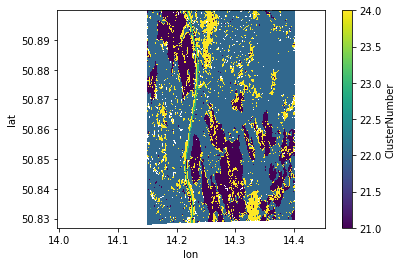

In [51]:
#TEILUNG FÜR ClusterNumber

ds_train1 = ds_sc.sel(**{'lat': slice(None, 50.9)})
ds_train1.ClusterNumber.plot()  # have a quick look on the data

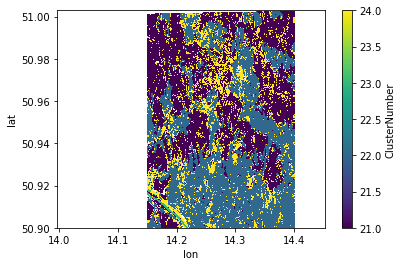

In [52]:
ds_test1 = ds_sc.sel(**{'lat': slice(50.9, None)})
ds_test1.ClusterNumber.plot()

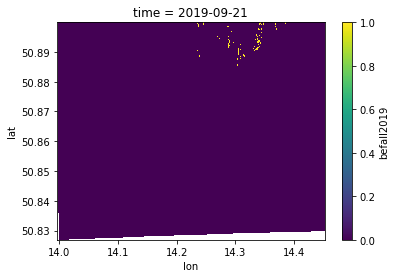

In [53]:
#TEILUNG FÜR Sachsenforst

ds_train2 = ds_sc.sel(**{'time':'2019-09-21', 'lat': slice(None, 50.9)})
ds_train2.befall2019.plot()  # have a quick look on the data

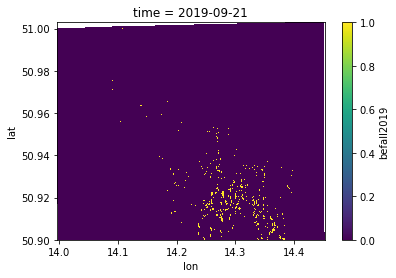

In [54]:
ds_test2 = ds_sc.sel(**{'time':'2019-09-21','lat': slice(50.9, None)})
ds_test2.befall2019.plot()

In [ ]:
df_train = ds_train[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'referenceData']].to_dataframe().dropna(how='any')
df_train